In [164]:
# How many unique companies are present in rounds2?
# import pandas, pd is an alias
# import numpy, np is an alias
import pandas as pd
import numpy as np
# reading a csv file as a dataframe
rounds2 = pd.read_csv("rounds2.csv",encoding = 'ANSI')
# convert in same format to avoid duplicate values
rounds2['company_permalink']=rounds2['company_permalink'].str.title()
rounds2.head()
# To find unique values based on key column and we will work on this one to merge dataframes.
len(rounds2['company_permalink'].unique().tolist())

66368

In [165]:
# Check basic details of dataframe

print(rounds2.shape)
print(rounds2.info())

(114949, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None


In [166]:
# How many unique companies are present in the companies file?
# reading a txt file as a dataframe
companies = pd.read_csv("companies.txt",sep='\t',encoding = 'ANSI')
# convert in same format to avoid duplicate values
companies['permalink']=companies['permalink'].str.title()
companies.head()
# To find unique values based on key column and we will work on this one to merge dataframes.
len(companies['permalink'].unique().tolist())

66368

In [167]:
# Check basic details of dataframe

print(companies.shape)
print(companies.info())

(66368, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
None


In [168]:
# Are there any companies in the rounds2 file which are not  present in companies.
# could observe from above details and number of rows are matching but could be different data in rows.
# check if permalink from companies are present in company_permalink of rounds2.

companies[~companies.permalink.isin(rounds2.company_permalink.values)]

# all data rows are matching so no rows came except header of company dataframe. 

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [169]:
# Merge the two data frames so that all variables (columns)in the companies frame are added to the rounds2 data frame. 
# Name the merged frame master_frame. How many observations are present in master_frame ?
# As column names are not matching in both dataframes perfoem below operation to merge dataframes with LEFT join.
master_frame = pd.merge(rounds2, companies,left_on='company_permalink',right_on='permalink',how='left')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-Qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/Organization/-The-One-Of-Them-Inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/Organization/0-6-Com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [170]:
# Check basic details of merged dataframe

print(master_frame.shape)
print(master_frame.info())

(114949, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB
None


In [171]:
# find columns which have missing data
master_frame.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [172]:
# sum missing values to find out if it's going to chnage end results in case it's big.
master_frame.isnull().sum()
# some columns have extremely large number of missing values. ex. funding_round_code and    founded_at

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [173]:
# find missing data in percentage
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

In [174]:
# remove columns which are not going to contribute in future analysis and have huge percent of missing data.
# ex. funding_round_code and founded_at
# master_frame = master_frame.drop('funding_round_code', axis=1)
# master_frame = master_frame.drop('founded_at', axis=1)
# Wantded to remove the columns but in seesion happend on sunday it was suggested not remove any columns from analysis. 
# We could remove only rows as suggested in the session.

In [175]:
# raised_amount_usd  column which we have to  focus in our analysis still have 17.39% of missing values.
# Good thing is company_permalink and permalink have no missing data which is our key columns.
# We can remove all null values from our main column raised_amount_usd.

In [176]:
# remove NaN raised_amount_usd rows
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]


In [177]:
# find missing data in percentage after removal of row deletion for raised_amount_usd
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        70.34
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
founded_at                16.81
dtype: float64

In [178]:
# Wantded to remove the columns but in seesion happend on sunday it was suggested not remove any columns from analysis. 
# We could remove only rows as suggested in the session.
# Remove few morw columns which will not be used in analysis
#master_frame = master_frame.drop('homepage_url', axis=1)
#master_frame = master_frame.drop('state_code', axis=1)
#master_frame = master_frame.drop('region', axis=1)
# master_frame = master_frame.drop('city', axis=1)
# Missing data report post cleanup 
#round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

In [179]:
# I think i am done with cleaning of data and we are good to go further with our analysis. 
# category_list and country_code still have null values so replace it with some temp value.

print(master_frame['category_list'].describe())
print(master_frame['country_code'].describe())

count             93915
unique            23485
top       Biotechnology
freq               7773
Name: category_list, dtype: object
count     89108
unique      134
top         USA
freq      62049
Name: country_code, dtype: object


In [180]:
# imputing null values by undefined for category_list column
master_frame.loc[pd.isnull(master_frame['category_list']), ['category_list']] = "undefined"
# imputing null values by TMP for country_code column
master_frame.loc[pd.isnull(master_frame['country_code']), ['country_code']] = 'TMP'
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        70.34
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              0.00
status                     0.00
country_code               0.00
state_code                 8.01
region                     7.42
city                       7.42
founded_at                16.81
dtype: float64

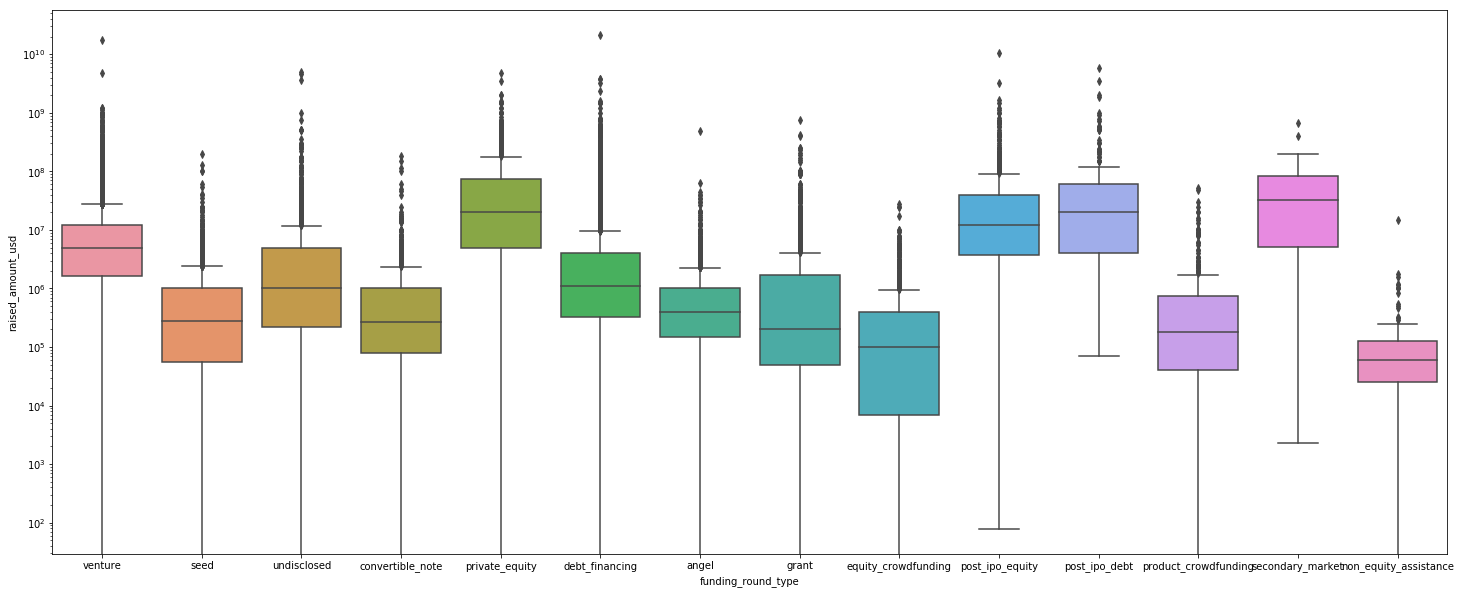

In [181]:
# boxplot of a variable across various funding categories
plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

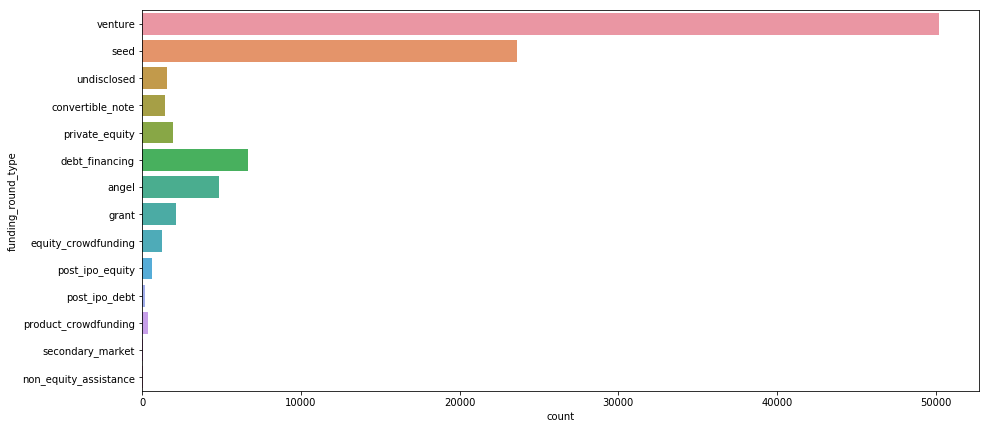

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting count across a categorical variable 
plt.figure(figsize=(15,7))
sns.countplot(y="funding_round_type", data=master_frame)
plt.show()

In [112]:
# Questions which will be answered based on results we will get from below solution.
# Average funding amount of venture type
# Average funding amount of angel type
# Average funding amount of seed type
# Average funding amount of private equity type
# Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, 
# which investment type is the most suitable for them?

# Steps Performed as below-
# Group based on funding round type to get the average funding amount for above asked queries.
# Find mean value of raised amount for different funding round type 
# To covert amount into redable format from scientific exponent value used apply with lambda.
# perfoem sort on raised amount column in discending order 

master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False).apply(lambda x: '{:.2f}'.format(x))

#master_frame.head()

funding_round_type
post_ipo_debt            168704571.82
post_ipo_equity           82182493.87
secondary_market          79649630.10
private_equity            73308593.03
undisclosed               19242370.23
debt_financing            17043526.02
venture                   11748949.13
grant                      4300576.34
convertible_note           1453438.54
product_crowdfunding       1363131.07
angel                       958694.47
seed                        719818.00
equity_crowdfunding         538368.21
non_equity_assistance       411203.05
Name: raised_amount_usd, dtype: object

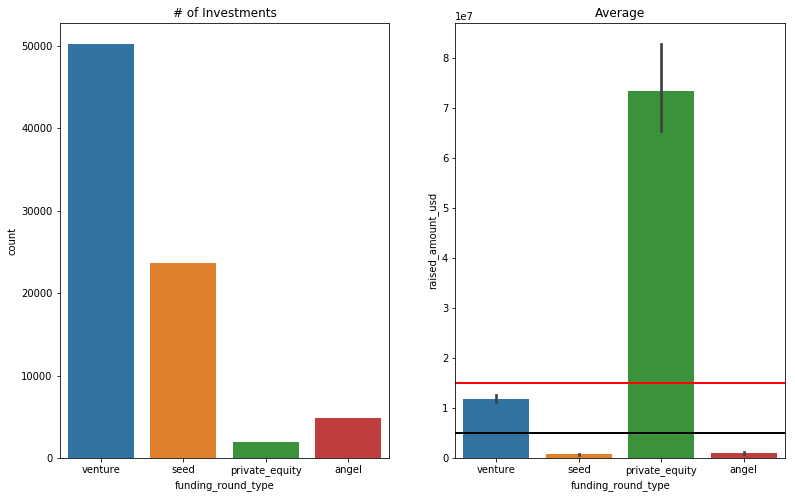

In [113]:
# A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and
# the average amount of investment in each funding type. 
# This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.
# 
import matplotlib.pyplot as plt
import seaborn as sns

master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

plt.figure(figsize=(13, 8))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("# of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.mean)
plt.title("Average")
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'r')
plt.show()

# Below barplot clearly represents that venture type is best suited for spark for investment.
# black horizontal line represnts 5 million and red horizontal line represents 15 million.
# we could see only venture type is falling in the range of 5 million to 15 million.

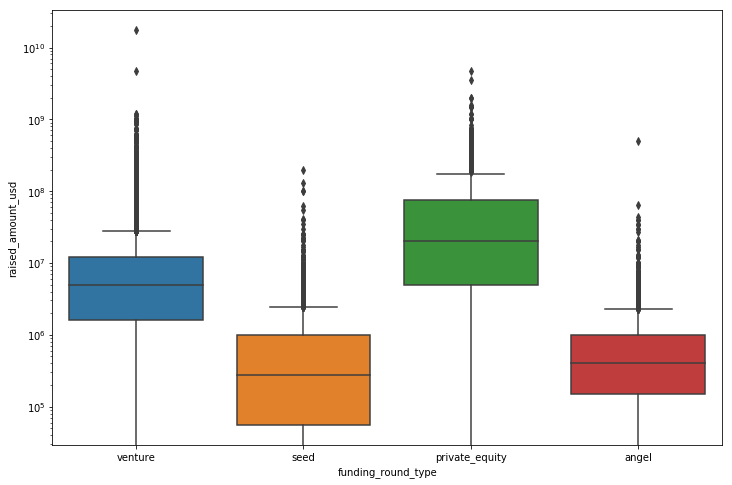

In [114]:
# boxplot of a variable across various funding categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

In [115]:
# Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type
# we will now focus on only 4 types of investment type.

master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

# have already removed the nulls but still want to check once in case there are any left.
master_frame[np.isfinite(master_frame['raised_amount_usd'])]

# Choose only venture as investment type and work on it.
master_frame = master_frame.loc[master_frame['funding_round_type'] == 'venture']

# Group the data based on country code to see highest investment for venture type in which country
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x: '{:.2f}'.format(x)).head(9)

country_code
USA    422510842796.00
CHN     39835418773.00
TMP     25506108414.00
GBR     20245627416.00
IND     14391858718.00
CAN      9583332317.00
FRA      7259536732.00
ISR      6907514579.00
DEU      6346959822.00
Name: raised_amount_usd, dtype: object

In [116]:
# Below results clearly show which are the top nine countries where investment is heavy.
# Now focus on mapping country code to english speaking country names

In [117]:
english_speak = pd.DataFrame({'country_code': ['USA', 'GBR', 'IND', 'CAN', 'ISR'], 
                   'country_name': ['United States of America', 'United Kingdom', 'India', 'Canada', 'Israel']})
english_speak.head()

,country_code,country_name
0,USA,United States of America
1,GBR,United Kingdom
2,IND,India
3,CAN,Canada
4,ISR,Israel


In [118]:
# Merge temp dataframe with english_speak dataframe to just show country name against counstry code.
# it has no other use in further analysis.
temp_df=pd.DataFrame(master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x: '{:.2f}'.format(x)))
pd.merge(temp_df,english_speak,on='country_code',how='inner')


,country_code,raised_amount_usd,country_name
0,USA,422510842796.00,United States of America
1,GBR,20245627416.00,United Kingdom
2,IND,14391858718.00,India
3,CAN,9583332317.00,Canada
4,ISR,6907514579.00,Israel


In [119]:
# Now load the mapping csv file with enoding ANSI as we have followed the same for other files.
mapping = pd.read_csv("mapping.csv", encoding = "ANSI")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [120]:
# Now use pd.melt melt(). Function is useful to massage a DataFrame into a format where one or more columns are 
# identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, 
# leaving just two non-identifier columns, variable and value.
mapping = pd.melt(mapping,id_vars=["category_list"])
mapping = mapping[mapping.value != 0]
# drop value
mapping = mapping.drop('value', axis=1)
# Rename it as required
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)
# change it to lower fomat
mapping['primary_sector'] = mapping['primary_sector'].str.lower()
mapping.head()

,primary_sector,main_sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports


In [121]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 8 to 6167
Data columns (total 2 columns):
primary_sector    687 non-null object
main_sector       688 non-null object
dtypes: object(2)
memory usage: 16.1+ KB


In [122]:
# function to strip additional values and pick only the first data
def pick_first(data):
    f_data = data.split('|')
    if len(f_data) > 1:
        return f_data[0]
    else:
        return data

In [123]:
# Noe use above function to pick only first data before pipe symbol. we could do this using lambda function as well.
master_frame['primary_sector'] = master_frame['category_list'].apply(pick_first)
master_frame['primary_sector'] = master_frame['primary_sector'].str.lower()
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media
3,/Organization/-The-One-Of-Them-Inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,TMP,NaN,NaN,NaN,NaN,apps
4,/Organization/0-6-Com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,curated web
8,/Organization/0Ndine-Biomedical-Inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,biotechnology
10,/Organization/0Xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics


In [124]:
# For the chosen investment type, make a data frame named top9 with the top nine countries 
# based on the total investment amount each country has received)
import numpy as np
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
# choose only top9 countries for further analysis
top9 = master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x: '{:.2f}'.format(x))

country_code
USA    422510842796.00
CHN     39835418773.00
GBR     20245627416.00
IND     14391858718.00
CAN      9583332317.00
FRA      7259536732.00
ISR      6907514579.00
DEU      6346959822.00
JPN      3363676611.00
Name: raised_amount_usd, dtype: object

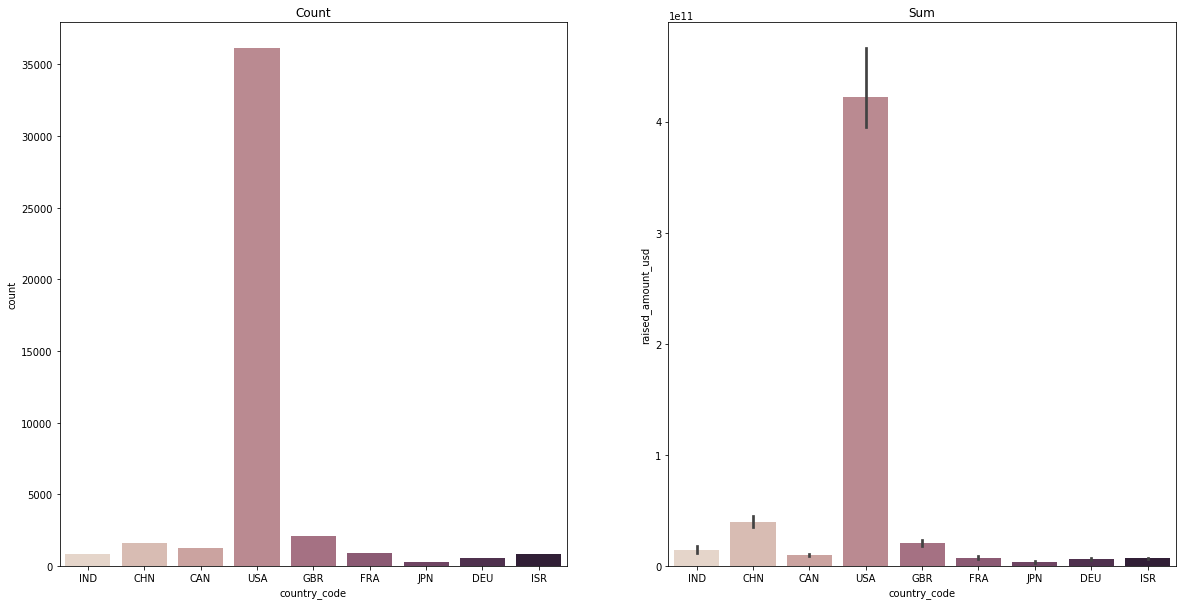

In [125]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT. 
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
# Plotting sum across top 9 country_code 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code",palette="ch:.15", data=top9)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd",palette="ch:.15", data=top9, estimator=sum)
plt.title("Sum")
plt.show()

In [126]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT. 
#USA, CHN, GBR, IND are top 4 but CHN is not English speaking country 
#so it’s clear that USA, GBR & IND are top 3 best suited for Spark.

In [127]:
# Identify the top three English-speaking countries in the data frame top9.
master3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
master3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x: '{:.2f}'.format(x))

country_code
USA    422510842796.00
GBR     20245627416.00
IND     14391858718.00
Name: raised_amount_usd, dtype: object

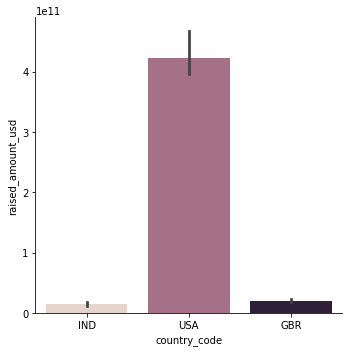

In [128]:
#Bar plot for top 3 english speaking countries (Country 1, Country 2, and Country 3)
# Plotting sum across top 3 country_code
sns.catplot(x="country_code",y="raised_amount_usd",data=master3_english,kind="bar",palette="ch:.10",height=5,estimator=sum);

In [129]:
# Basic details before we merge it with mapping dataframe.
master3_english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39018 entries, 0 to 114936
Data columns (total 17 columns):
company_permalink          39018 non-null object
funding_round_permalink    39018 non-null object
funding_round_type         39018 non-null object
funding_round_code         21202 non-null object
funded_at                  39018 non-null object
raised_amount_usd          39018 non-null float64
permalink                  39018 non-null object
name                       39018 non-null object
homepage_url               37161 non-null object
category_list              39018 non-null object
status                     39018 non-null object
country_code               39018 non-null object
state_code                 38945 non-null object
region                     38860 non-null object
city                       38860 non-null object
founded_at                 32692 non-null object
primary_sector             39018 non-null object
dtypes: float64(1), object(16)
memory usage: 6.6+ MB


In [130]:
# merge it on left join on primary sector
master3_english = pd.merge(master3_english, mapping, how='left', on='primary_sector', indicator=True)
master3_english.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,_merge
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment,both
1,/Organization/0Xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,NaN,left_only
2,/Organization/0Xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,NaN,left_only
3,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,NaN,left_only
4,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/Organization/1-Mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps,"News, Search and Messaging",both


In [131]:
# Basic details before we merge it with mapping dataframe.
master3_english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39018 entries, 0 to 39017
Data columns (total 19 columns):
company_permalink          39018 non-null object
funding_round_permalink    39018 non-null object
funding_round_type         39018 non-null object
funding_round_code         21202 non-null object
funded_at                  39018 non-null object
raised_amount_usd          39018 non-null float64
permalink                  39018 non-null object
name                       39018 non-null object
homepage_url               37161 non-null object
category_list              39018 non-null object
status                     39018 non-null object
country_code               39018 non-null object
state_code                 38945 non-null object
region                     38860 non-null object
city                       38860 non-null object
founded_at                 32692 non-null object
primary_sector             39018 non-null object
main_sector                36187 non-null object
_merge  

In [132]:
left_only = master3_english[master3_english['_merge'] != 'both']
left_only.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,_merge
1,/Organization/0Xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,NaN,left_only
2,/Organization/0Xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,NaN,left_only
3,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,NaN,left_only
12,/Organization/100Plus,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,NaN,02-11-2011,500000.0,/Organization/100Plus,100Plus,http://www.100plus.com,Analytics,acquired,USA,CA,SF Bay Area,San Francisco,16-09-2011,analytics,NaN,left_only
43,/Organization/1World-Online,/funding-round/32936e588a134502712877150198a0b3,venture,A,13-08-2015,2500000.0,/Organization/1World-Online,1World Online,http://1worldonline.com,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,CA,SF Bay Area,San Jose,01-12-2011,analytics,NaN,left_only


In [133]:
# find unique primary sector name
left_only.primary_sector.sort_values(ascending=True).unique()

array(['adaptive equipment', 'alternative medicine', 'analytics',
       'big data analytics', 'biotechnology and semiconductor',
       'business analytics', 'cannabis', 'career management',
       'cloud management', 'contact management',
       'digital rights management', 'digital signage',
       'document management', 'educational games', 'energy management',
       'event management', 'finance', 'finance technology',
       'financial exchanges', 'financial services', 'fleet management',
       'governance', 'greentech', 'identity management',
       'innovation management', 'intellectual asset management',
       'investment management', 'it management', 'journalism',
       'knowledge management', 'lead management', 'mobile analytics',
       'nanotechnology', 'natural gas uses',
       'natural language processing', 'navigation', 'personal finance',
       'personalization', 'product search', 'professional networking',
       'professional services', 'project management',
   

In [134]:
# find unique, sort it.
mapping.primary_sector.sort_values(ascending=True)


1847                 0notechnology
1848    0tural language processing
1849              0tural resources
4602                     0vigation
3441                            3d
3442                   3d printing
3443                 3d technology
5526                      a0lytics
5508                    accounting
2757              active lifestyle
5510                  ad targeting
3447            advanced materials
8                 adventure travel
5513                   advertising
5514         advertising exchanges
5515          advertising networks
5516         advertising platforms
4829                        advice
14                       aerospace
3455                   agriculture
1392         air pollution control
4833                    algorithms
4834                   all markets
4835                  all students
2772           alter0tive medicine
4837                        alumni
5527                       android
4840                        angels
2777                

In [135]:
# we can see that na is misspelt as 0 in above unique primary sector details which need to be corrected.
# we can use regular expression for that.
import re
mapping['primary_sector'] = mapping.primary_sector.apply(lambda x: re.sub('[0]', 'na', str(x)))
mapping.primary_sector.sort_values(ascending=True)

3441                                    3d
3442                           3d printing
3443                         3d technology
5508                            accounting
2757                      active lifestyle
5510                          ad targeting
3447                    advanced materials
8                         adventure travel
5513                           advertising
5514                 advertising exchanges
5515                  advertising networks
5516                 advertising platforms
4829                                advice
14                               aerospace
3455                           agriculture
1392                 air pollution control
4833                            algorithms
4834                           all markets
4835                          all students
2772                  alternative medicine
4837                                alumni
5526                             analytics
5527                               android
4840       

In [136]:
master3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
master3_english = pd.merge(master3_english, mapping, how='left', on='primary_sector', indicator=True)
left_only = master3_english[master3_english['_merge'] != 'both']
left_only.primary_sector.sort_values(ascending=True).unique()

array(['adaptive equipment', 'biotechnology and semiconductor',
       'enterprise 2.0', 'greentech', 'natural gas uses',
       'product search', 'racing', 'rapidly expanding', 'retirement',
       'specialty retail', 'undefined'], dtype=object)

In [137]:
len(left_only)


230

In [138]:
# we can remove all rows that does not have 'both' indicator.
master3_english = master3_english[master3_english['_merge'] == 'both']
master3_english = master3_english.drop('_merge', axis=1)
master3_english.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
1,/Organization/0Xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
2,/Organization/0Xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
3,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
4,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/Organization/1-Mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps,"News, Search and Messaging"


In [139]:
#basic details check
master3_english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 39017
Data columns (total 18 columns):
company_permalink          38788 non-null object
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
funding_round_code         21079 non-null object
funded_at                  38788 non-null object
raised_amount_usd          38788 non-null float64
permalink                  38788 non-null object
name                       38788 non-null object
homepage_url               36998 non-null object
category_list              38788 non-null object
status                     38788 non-null object
country_code               38788 non-null object
state_code                 38716 non-null object
region                     38632 non-null object
city                       38632 non-null object
founded_at                 32614 non-null object
primary_sector             38788 non-null object
main_sector                38788 non-null object
dtypes: 

In [140]:
#Create three separate data frames D1, D2 and D3 for each of the three countries containing 
# the observations of funding type FT falling within the 5-15 million USD range. 
# drop all rows whose investment is not between 5 and 15 million
pd.options.display.float_format = '{:,.2f}'.format
master3_english = master3_english.drop(master3_english[(master3_english.raised_amount_usd < 5000000)].index)
master3_english = master3_english.drop(master3_english[(master3_english.raised_amount_usd > 15000000)].index)

# d1 for USA
d1 = master3_english[master3_english['country_code'] == 'USA']
# d2 for GBR
d2 = master3_english[master3_english['country_code'] == 'GBR']
# d3 for IND
d3 = master3_english[master3_english['country_code'] == 'IND']

In [141]:
d1_tmp = d1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(columns={'sum':'Total_amount','count' : 'Total_count'})
d1 = d1.merge(d1_tmp, how='left', on ='main_sector')
d1.head()

C:\Users\91962\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000.00",/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising","23,807,376,964.00",2714
1,/Organization/1-Mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,"5,000,000.00",/Organization/1-Mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps,"News, Search and Messaging","13,971,567,428.00",1583
2,/Organization/128-Technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,"11,999,347.00",/Organization/128-Technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,service providers,Others,"26,321,007,002.00",2950
3,/Organization/1366-Technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,"15,000,000.00",/Organization/1366-Technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,"7,258,553,378.00",799
4,/Organization/1366-Technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,"5,000,000.00",/Organization/1366-Technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,"7,258,553,378.00",799


In [142]:
d2_tmp = d2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(columns={'sum':'Total_amount','count' : 'Total_count'})
d2 = d2.merge(d2_tmp, how='left', on ='main_sector')
d2.head()

C:\Users\91962\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/Organization/365Scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,"5,500,000.00",/Organization/365Scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,android,"Social, Finance, Analytics, Advertising","1,089,404,014.00",133
1,/Organization/7Digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,"8,468,328.00",/Organization/7Digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,content creators,Entertainment,"482,784,687.00",56
2,/Organization/7Digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,"10,000,000.00",/Organization/7Digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,content creators,Entertainment,"482,784,687.00",56
3,/Organization/90Min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,"15,000,000.00",/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment,"482,784,687.00",56
4,/Organization/90Min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,"5,800,000.00",/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment,"482,784,687.00",56


In [143]:
d3_tmp = d3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(columns={'sum':'Total_amount','count' : 'Total_count'})
d3 = d3.merge(d3_tmp, how='left', on ='main_sector')
d3.head()

C:\Users\91962\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/Organization/-Fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment,"280,830,000.00",33
1,/Organization/21Diamonds-India,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,"6,369,507.00",/Organization/21Diamonds-India,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,e-commerce,Others,"1,013,409,507.00",110
2,/Organization/A-Little-World,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,"6,410,000.00",/Organization/A-Little-World,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,finance,"Social, Finance, Analytics, Advertising","550,549,550.00",60
3,/Organization/Adlabs-Imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,"8,180,000.00",/Organization/Adlabs-Imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,entertainment,Entertainment,"280,830,000.00",33
4,/Organization/Agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,"5,740,000.00",/Organization/Agile,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,finance,"Social, Finance, Analytics, Advertising","550,549,550.00",60


In [144]:
#Total number of Investments (count) for USA

d1['raised_amount_usd'].count()


12063

In [145]:
#Total number of Investments (count) for GBR

d2['raised_amount_usd'].count()

621

In [146]:
#Total number of Investments (count) for IND

d3['raised_amount_usd'].count()

328

In [147]:
#Total amount of investment (USD) for USA

d1['raised_amount_usd'].sum()

107757097294.0

In [148]:
#Total amount of investment (USD) for GBR

d2['raised_amount_usd'].sum()

5379078691.0

In [149]:
#Total amount of investment (USD) for IND

d3['raised_amount_usd'].sum()


2949543602.0

In [150]:
#Top Sector name (no. of investment-wise) for USA
#Second Sector name (no. of investment-wise)
#Third Sector name (no. of investment-wise)

d1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [151]:
#Top Sector name (no. of investment-wise) for GBR
#Second Sector name (no. of investment-wise)
#Third Sector name (no. of investment-wise)

d2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [152]:
#Top Sector name (no. of investment-wise) for IND
#Second Sector name (no. of investment-wise)
#Third Sector name (no. of investment-wise)

d3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [153]:
d1[d1['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/Organization/Virtustream           64,300,000.00
/Organization/Capella               54,968,051.00
/Organization/Airtight-Networks     54,201,907.00
/Organization/Decarta               52,100,000.00
/Organization/Black-Duck-Software   51,000,000.00
Name: raised_amount_usd, dtype: float64

In [154]:
d2[d2['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/Organization/Electric-Cloud            37,000,000.00
/Organization/Sensage                   36,250,000.00
/Organization/Enigmatic                 32,500,000.00
/Organization/Silverrail-Technologies   29,000,000.00
/Organization/Opencloud                 27,972,766.00
Name: raised_amount_usd, dtype: float64

In [155]:
d3[d3['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/Organization/Firstcry-Com       39,000,000.00
/Organization/Myntra             38,000,000.00
/Organization/Commonfloor        32,900,000.00
/Organization/Pepperfry-Com      28,000,000.00
/Organization/Itzcash-Card-Ltd   25,000,000.00
Name: raised_amount_usd, dtype: float64

In [156]:
d1[d1['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/Organization/Shotspotter   67,933,006.00
/Organization/Demandbase    63,000,000.00
/Organization/Intacct       61,800,000.00
/Organization/Netbase       60,600,000.00
/Organization/Lotame        59,700,000.00
Name: raised_amount_usd, dtype: float64

In [157]:
d2[d2['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/Organization/Celltick-Technologies   37,500,000.00
/Organization/Mythings                34,000,000.00
/Organization/Zopa                    32,900,000.00
/Organization/Imagini                 28,550,000.00
/Organization/Marketinvoice           25,553,007.00
Name: raised_amount_usd, dtype: float64

In [158]:
d3[d3['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/Organization/Manthan-Systems              50,700,000.00
/Organization/Komli-Media                  28,000,000.00
/Organization/Shopclues-Com                25,000,000.00
/Organization/Intarvo                      21,900,000.00
/Organization/Grameen-Financial-Services   21,556,050.00
Name: raised_amount_usd, dtype: float64

In [159]:
d1 = d1[d1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
d1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/Organization/0Xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000.00",/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising","23,807,376,964.00",2714
2,/Organization/128-Technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,"11,999,347.00",/Organization/128-Technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,service providers,Others,"26,321,007,002.00",2950
8,/Organization/170-Systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,"14,000,000.00",/Organization/170-Systems,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,software,Others,"26,321,007,002.00",2950
9,/Organization/17Zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,A,01-01-2011,"5,000,000.00",/Organization/17Zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,01-01-2007,education,Others,"26,321,007,002.00",2950
10,/Organization/17Zuoye,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,B,01-09-2013,"10,000,000.00",/Organization/17Zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,01-01-2007,education,Others,"26,321,007,002.00",2950
11,/Organization/1Bog,/funding-round/3d2463c9b97f32b3be8747fbd629961f,venture,A,11-02-2010,"5,000,000.00",/Organization/1Bog,One Block Off the Grid (1BOG),http://1bog.org,Clean Technology|Residential Solar,closed,USA,CA,SF Bay Area,San Francisco,01-11-2008,clean technology,Cleantech / Semiconductors,"21,633,430,822.00",2350
12,/Organization/1Stdibs,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,C,24-01-2014,"15,000,000.00",/Organization/1Stdibs,1stdibs,http://www.1stdibs.com,E-Commerce,operating,USA,NY,New York City,New York,01-01-2001,e-commerce,Others,"26,321,007,002.00",2950
15,/Organization/21E6,/funding-round/bdf9f5bf67ee51155eae223acac57ec5,venture,A,17-11-2013,"5,050,000.00",/Organization/21E6,21 Inc,https://21.co,Big Data|Bitcoin|Hardware + Software|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-05-2013,big data,"Social, Finance, Analytics, Advertising","23,807,376,964.00",2714
16,/Organization/22Nd-Century-Group,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,NaN,18-09-2014,"10,000,000.00",/Organization/22Nd-Century-Group,22nd Century Group,http://www.xxiicentury.com,Biotechnology,ipo,USA,NY,NY - Other,Clarence,01-01-1998,biotechnology,Cleantech / Semiconductors,"21,633,430,822.00",2350
17,/Organization/23Andme,/funding-round/97062e0d50c2955cbe40bf8220d87b08,venture,C,07-01-2011,"9,000,000.00",/Organization/23Andme,23andMe,http://23andme.com,Biotechnology|Search,operating,USA,CA,SF Bay Area,Mountain View,01-04-2006,biotechnology,Cleantech / Semiconductors,"21,633,430,822.00",2350


In [160]:
d2 = d2[d2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]
d2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/Organization/365Scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,"5,500,000.00",/Organization/365Scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,android,"Social, Finance, Analytics, Advertising","1,089,404,014.00",133
5,/Organization/Abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,B,18-05-2015,"8,259,067.00",/Organization/Abcodia,Abcodia,http://abcodia.com,Biotechnology,operating,GBR,H9,London,London,01-01-2010,biotechnology,Cleantech / Semiconductors,"1,163,990,056.00",130
6,/Organization/Acacia-Pharma,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,A,31-03-2011,"10,000,000.00",/Organization/Acacia-Pharma,Acacia Pharma,http://www.acaciapharma.com,Biotechnology,operating,GBR,C3,London,Cambridge,01-01-2006,biotechnology,Cleantech / Semiconductors,"1,163,990,056.00",130
7,/Organization/Acal-Energy,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,NaN,15-06-2011,"9,910,333.00",/Organization/Acal-Energy,ACAL Energy,http://www.acalenergy.co.uk,Clean Technology,operating,GBR,C5,Runcorn,Runcorn,01-08-2004,clean technology,Cleantech / Semiconductors,"1,163,990,056.00",130
8,/Organization/Acal-Enterprise-Solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,NaN,03-06-2014,"10,720,178.00",/Organization/Acal-Enterprise-Solutions,Acal Enterprise Solutions,http://acalenterprisesolutions.com,Information Technology,operating,GBR,J8,Nottingham,Nottingham,01-01-1990,information technology,"Social, Finance, Analytics, Advertising","1,089,404,014.00",133
12,/Organization/Acs-Clothing,/funding-round/064999587157b0ceae7843204a105d6d,venture,NaN,28-09-2015,"13,359,377.00",/Organization/Acs-Clothing,ACS Clothing,http://hirewear.co.uk,E-Commerce,operating,GBR,V2,Glasgow,Glasgow,01-01-1997,e-commerce,Others,"1,283,624,289.00",147
13,/Organization/Acs-Clothing,/funding-round/875b4295af2381558cec9d97f86fe3e4,venture,NaN,02-03-2014,"12,879,637.00",/Organization/Acs-Clothing,ACS Clothing,http://hirewear.co.uk,E-Commerce,operating,GBR,V2,Glasgow,Glasgow,01-01-1997,e-commerce,Others,"1,283,624,289.00",147
14,/Organization/Adbrain,/funding-round/71f1b5903874817292d67e1ac6aa66b2,venture,A,11-03-2014,"7,500,000.00",/Organization/Adbrain,Adbrain,http://adbrain.com,Advertising|Enterprise Software|Marketing Auto...,operating,GBR,H9,London,London,01-01-2012,advertising,"Social, Finance, Analytics, Advertising","1,089,404,014.00",133
15,/Organization/Adinsight,/funding-round/5bcca548aeccd5acdea0d0edb086db8d,venture,B,07-05-2014,"6,772,812.00",/Organization/Adinsight,ResponseTap,http://www.responsetap.com,Advertising|Enterprise Software|SaaS,operating,GBR,I2,Manchester,Manchester,01-06-2008,advertising,"Social, Finance, Analytics, Advertising","1,089,404,014.00",133
16,/Organization/Adjug,/funding-round/83653befbf3c473ec97a1617479448c8,venture,B,01-03-2008,"6,500,000.00",/Organization/Adjug,Adjug,http://www.adjug.com,Advertising|Internet|Marketplaces|Publishing,acquired,GBR,H9,London,London,01-01-2007,advertising,"Social, Finance, Analytics, Advertising","1,089,404,014.00",133


In [161]:
d3 = d3[d3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]
d3

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
1,/Organization/21Diamonds-India,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,"6,369,507.00",/Organization/21Diamonds-India,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,e-commerce,Others,"1,013,409,507.00",110
2,/Organization/A-Little-World,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,"6,410,000.00",/Organization/A-Little-World,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,finance,"Social, Finance, Analytics, Advertising","550,549,550.00",60
4,/Organization/Agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,"5,740,000.00",/Organization/Agile,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,finance,"Social, Finance, Analytics, Advertising","550,549,550.00",60
5,/Organization/Akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,A,01-07-2014,"5,000,000.00",/Organization/Akosha,Akosha,http://www.akosha.com,Consumer Internet|Digital Media|Enterprise Sof...,operating,IND,7,New Delhi,New Delhi,01-06-2010,consumer internet,"Social, Finance, Analytics, Advertising","550,549,550.00",60
6,/Organization/Amagi-Media-Labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,A,17-06-2013,"5,500,000.00",/Organization/Amagi-Media-Labs,Amagi Media Labs,http://amagi.com,Advertising,operating,IND,19,Bangalore,Bangalore,01-01-2008,advertising,"Social, Finance, Analytics, Advertising","550,549,550.00",60
7,/Organization/Ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,A,03-07-2015,"5,000,000.00",/Organization/Ameyo,Ameyo,http://www.ameyo.com/,Software,operating,IND,10,New Delhi,Gurgaon,01-01-2003,software,Others,"1,013,409,507.00",110
9,/Organization/Annapurna-Microfinace,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,B,26-03-2014,"5,000,000.00",/Organization/Annapurna-Microfinace,Annapurna Microfinace,http://ampl.net.in,Finance,operating,IND,21,Bhubaneswar,Bhubaneswar,01-01-2009,finance,"Social, Finance, Analytics, Advertising","550,549,550.00",60
12,/Organization/Apnaloan,/funding-round/43f871c060118fcdf5316b3bf0797618,venture,B,01-12-2007,"15,000,000.00",/Organization/Apnaloan,ApnaPaisa,http://apnapaisa.com,Credit|Finance|Marketplaces,operating,IND,16,Mumbai,Mumbai,01-01-2007,credit,"Social, Finance, Analytics, Advertising","550,549,550.00",60
13,/Organization/Applabs,/funding-round/29152fc812013ef482c93f6dd47f58ff,venture,NaN,29-06-2006,"10,000,000.00",/Organization/Applabs,AppLabs,http://www.applabs.com,Software,acquired,IND,2,Hyderabad,Hyderabad,01-01-2001,software,Others,"1,013,409,507.00",110
14,/Organization/Appsdaily-Solutions,/funding-round/4979e1bb00ddc452753682273fd4466c,venture,B,10-04-2014,"5,000,000.00",/Organization/Appsdaily-Solutions,Appsdaily Solutions,http://appsdailyworld.com/daily/index.jsp,Software,operating,IND,16,Mumbai,Mumbai,01-01-2008,software,Others,"1,013,409,507.00",110


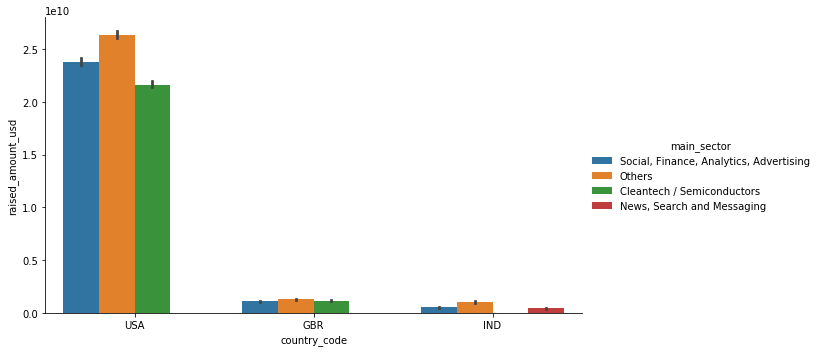

In [162]:
# A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
# (for the chosen investment type FT). 
result = pd.concat([d1, d2, d3])
sns.catplot(x="country_code",y="raised_amount_usd",hue="main_sector", kind="bar",aspect=1.7, data=result,estimator=sum)
plt.show()